First few rows of the Academic Performance dataset:
   Student_ID  Math_Score  English_Score  Science_Score  \
0           1        88.0           48.0           60.0   
1           2         NaN           63.0           62.0   
2           3         NaN           40.0           81.0   
3           4         NaN           83.0           63.0   
4           5         NaN           47.0           91.0   

   Attendance_Percentage  Study_Hours_Per_Day  
0              81.168483             5.847684  
1              98.204003             4.572976  
2              99.209915             1.205338  
3              78.517629             2.994105  
4              79.160916             3.167604  

Updated dataset after handling missing values and inconsistencies:
   Student_ID  Math_Score  English_Score  Science_Score  \
0           1   88.000000           48.0           60.0   
1           2   74.422222           63.0           62.0   
2           3   74.422222           40.0           81.0   
3

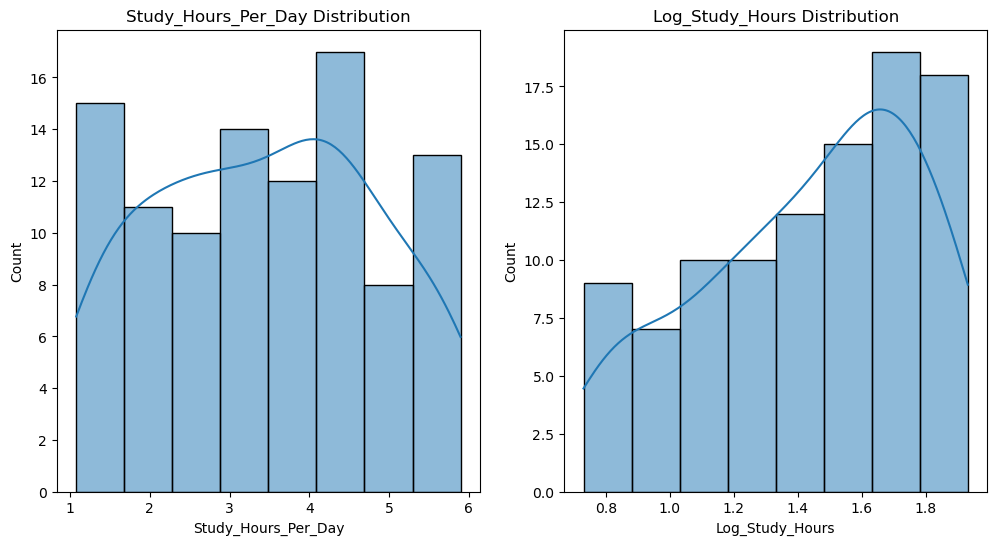

In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(42)

# 1. Create the "Academic Performance" dataset
data = {
    'Student_ID': range(1, 101),
    'Math_Score': np.random.randint(50, 100, size=100),
    'English_Score': np.random.randint(40, 95, size=100),
    'Science_Score': np.random.randint(55, 98, size=100),
    'Attendance_Percentage': np.random.uniform(70, 100, size=100),
    'Study_Hours_Per_Day': np.random.uniform(1, 6, size=100),
}

academic_df = pd.DataFrame(data)

# Introduce missing values and inconsistencies for demonstration
academic_df.loc[1:10, 'Math_Score'] = np.nan
academic_df.loc[30:40, 'English_Score'] = np.nan
academic_df.loc[50:60, 'Science_Score'] = np.nan
academic_df.loc[70:80, 'Attendance_Percentage'] = np.nan

# Display first few rows of the dataset
print("First few rows of the Academic Performance dataset:")
print(academic_df.head())

# 1. Scan all variables for missing values and inconsistencies
# Use mean valure of the column for missing values and replace any negative values with NaN
academic_df.fillna(academic_df.mean(), inplace=True)
academic_df[academic_df < 0] = np.nan

# Display the updated dataset after handling missing values and inconsistencies
print("\nUpdated dataset after handling missing values and inconsistencies:")
print(academic_df.head())

# 2. Scan all numeric variables for outliers
# Use Z-score to identify and handle outliers
numeric_vars = ['Math_Score', 'English_Score', 'Science_Score', 'Attendance_Percentage', 'Study_Hours_Per_Day']

# The formula for z-score is (value - mean) / standard deviation
z_scores = (academic_df[numeric_vars] - academic_df[numeric_vars].mean()) / academic_df[numeric_vars].std()
outliers = (z_scores > 3) | (z_scores < -3)

# Replace outliers with NaN
academic_df[outliers] = np.nan

# Display the dataset after handling outliers
print("\nDataset after handling outliers:")
print(academic_df.head())
#this code identifies outliers in the numeric variables of academic_df based on z-scores and 
#replaces those outliers with NaN values. This is a common technique for handling outliers in datasets,

# 3. Apply data transformations
# Log transformation on 'Study_Hours_Per_Day' to decrease skewness
academic_df['Log_Study_Hours'] = np.log1p(academic_df['Study_Hours_Per_Day'])

# Display the dataset after the log transformation
print("\nDataset after log transformation:")
print(academic_df.head())

# Visualize the distribution before and after the transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(academic_df['Study_Hours_Per_Day'], kde=True)
plt.title('Study_Hours_Per_Day Distribution')

plt.subplot(1, 2, 2)
sns.histplot(academic_df['Log_Study_Hours'], kde=True)
plt.title('Log_Study_Hours Distribution')

plt.show()
